# MOwNiT
## Laboratorium
### Całkowanie

In [1]:
using Pkg
#Pkg.add("QuadGK")
using QuadGK
using Polynomials
using Plots

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
(xp, a) = gauss(Float64,7);

In [3]:
xp

7-element Array{Float64,1}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [4]:
a

7-element Array{Float64,1}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [5]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

### Zadanie 5 (1p)
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

# Zadanie 1

In [6]:
zero = Polynomial([1])
first = Polynomial([0,1])

Polynomial(x)

In [7]:
second = 1.5*first*first - 0.5*zero

Polynomial(-0.5 + 1.5*x^2)

In [8]:
third = (5/3)*first*second - (2/3)*first

Polynomial(-1.5*x + 2.5*x^3)

In [9]:
fourth = (7/4)*first*third - (3/4)*second

Polynomial(0.375 - 3.75*x^2 + 4.375*x^4)

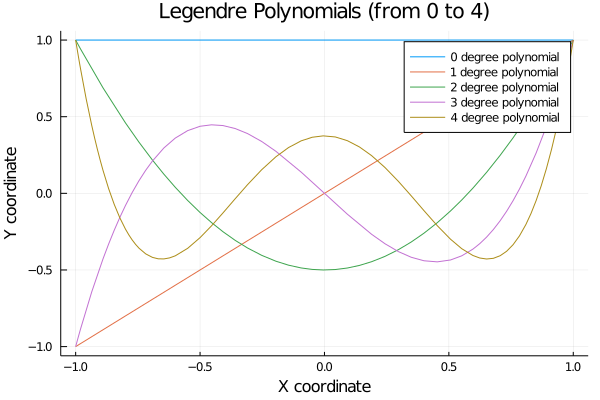

In [10]:
plot(x->zero(x), -1, 1,title = "Legendre Polynomials (from 0 to 4)",xlabel = "X coordinate",ylabel = "Y coordinate",label = "0 degree polynomial")
plot!(x->first(x), -1, 1,label = "1 degree polynomial")
plot!(x->second(x), -1, 1,label = "2 degree polynomial")
plot!(x->third(x), -1, 1,label = "3 degree polynomial")
plot!(x->fourth(x), -1, 1,label = "4 degree polynomial")

In [11]:
(xp2, a) = gauss(Float64,2);
(xp3, a) = gauss(Float64,3);
(xp4, a) = gauss(Float64,4);

In [12]:
roots(second)

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

In [13]:
xp2 #Zera wielomianu drugiego stopnia zgadzaja sie z odcietymi Gaussa

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896258

In [14]:
roots(third)

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414835
  0.0

In [15]:
xp3 #Zera wielomianu trzeciego stopnia zgadzaja sie z odcietymi Gaussa

3-element Array{Float64,1}:
 -0.7745966692414834
  0.0
  0.7745966692414834

In [16]:
roots(fourth)

4-element Array{Float64,1}:
 -0.8611363115940536
 -0.33998104358485653
  0.3399810435848563
  0.8611363115940531

In [17]:
xp4 #Zera wielomianu czwartego stopnia zgadzaja sie z odcietymi Gaussa

4-element Array{Float64,1}:
 -0.8611363115940526
 -0.3399810435848563
  0.3399810435848563
  0.8611363115940526

Związek z uzyskanymi rezultatami oraz twierdzieniem dotyczącym kwadratur Gaussa jest taki, że otrzymane rezultaty potwierdzają fakt, że odcięte n-punktowej kwadratury Gaussa z funkcja wazaca w(x) w [a,b] są zerami wielomianu ortogonalnego p(x) dla tego samego przedzialu [a,b] i funcji wazacej.

# Zadanie 2

In [18]:
function calculate(k,f)
    (points,a) = gauss(Float64,k)
    res = sum(a .* f.(points)) 
    return res
end

calculate (generic function with 1 method)

In [19]:
f(x)=x^2
print(calculate(7,f))

0.6666666666666669

In [20]:
calculations = zeros(0)
for i in 1:10
    f(x) = x^i
    res = calculate(3,f)
    append!(calculations,res)
end

In [21]:
calculations

10-element Array{Float64,1}:
 0.0
 0.6666666666666667
 0.0
 0.40000000000000013
 0.0
 0.24000000000000007
 0.0
 0.14400000000000007
 0.0
 0.08640000000000003

Funkcja przestaje być dokładna wraz ze wzrostem ilości punktów branych pod uwagę do funkcji gauss(). Brak poprawności można juz zauważyć przy ilości punktów równej 4 co przejawia się otrzymywaniem ujemnych wyników, co nie powinno mieć miejsca, ponieważ minimalna wartość wyrażenia jest równa 0.

In [22]:
calculations = zeros(0)
for i in 1:20
    f(x) = x^i
    res = calculate(6,f)
    append!(calculations,res)
end

In [23]:
calculations

20-element Array{Float64,1}:
 -8.326672684688674e-17
  0.6666666666666669
 -2.7755575615628914e-17
  0.4
 -1.3877787807814457e-17
  0.28571428571428586
  0.0
  0.22222222222222238
  0.0
  0.18181818181818193
  0.0
  0.1531080751859974
  0.0
  0.13094911560082767
  0.0
  0.11290785467022466
  0.0
  0.0977569586968132
  0.0
  0.08481758799621951

Związek z twierdzeniem o stopniu dokładności kwadratury Gaussa można zauważyć obserwując rezultaty, że kwadratura Gaussa faktycznie jest najbardziej dokładna dla wielomianów stopnia 2N+1 gdzie N to liczba punktów w kwadraturze. W przypadku wielomianów innego stopnia istnieje szansa wystąpienia niedokładności co powoduje otrzymywanie błędnych wartości np. ujemnych gdzie wartości muszą być nieujemne .

# Zadanie 3

In [24]:
function calculateInterval(k,f,a,b)
    g(x) = f((b+a)/2 + ((b-a)/2)*x)
    res = calculate(k,g)
    return 2*res/(b-a)
end

calculateInterval (generic function with 1 method)

In [25]:
f(x) = x^2
calculateInterval(6,f,0,3) #Poprawny wynik

4.0

In [26]:
f(x) = x + 5
calculateInterval(6,f,1,3) #Poprawny wynik

14.0

In [27]:
f(x) = x^3 + 2*x^2 + x + 5
calculateInterval(6,f,1,3) #Poprawny wynik

51.333333333333336

# Zadanie 4

In [28]:
f(x) = x^4 + 3*x^3 + x + 9

f (generic function with 1 method)

In [29]:
quadgk(f,0,3)

(140.85000000000002, 5.684341886080802e-14)

In [30]:
f(x) = x^2 + x + 1
quadgk(f,-2,2)

(9.333333333333334, 3.552713678800501e-15)

In [31]:
f(x) = exp(-(x^2)/2)/sqrt(2*pi)

f (generic function with 1 method)

In [32]:
quadgk(f,-Inf,Inf)

(1.0000000000032583, 1.4395584941504537e-8)

# Zadanie 5 - Wykladnicza funkcja

In [33]:
function rectangularMethod(f,a,b,n)
    integral = 0
    h = (b-a)/n
    for i in 0:n-1
        integral+=f(i*h)
    end
    integral*=h
    return integral
end

rectangularMethod (generic function with 1 method)

In [34]:
function trapezeMethod(f,a,b,n)
    integral = 0
    first = f(a)
    second = f(b)
    h = (b-a)/n
    for i in 1:n-1
        integral+=f(i*h)
    end
    integral+=(first + second)/2
    integral*=h
    return integral
end

trapezeMethod (generic function with 1 method)

In [35]:
f(x) = x^2
trapezeMethod(f,0,3,3)

9.5

In [36]:
f(x) = 3^x #Rozwazymy funkcje wykladnicza na przedziale 0-10
trapeze = zeros(0)
rectangular = zeros(0)
(real,add) = quadgk(f,0,10)
NumOfIntervals = zeros(0)
for i in 1:200
    a = rectangularMethod(f,0,10,i)
    b = trapezeMethod(f,0,10,i)
    append!(rectangular,abs(a - real))
    append!(trapeze,abs(b - real))
    append!(NumOfIntervals,i)
end

In [37]:
real

53747.80585386153

In [38]:
using DataFrames

In [39]:
Results = DataFrame(NumOfIntervals = NumOfIntervals,trapezeMethodValError = trapeze,rectangularMethodValError = rectangular)

,NumOfIntervals,trapezeMethodValError,rectangularMethodValError
,Float64,Float64,Float64
1,1.0,2.41502e5,53737.8
2,2.0,95092.2,52527.8
3,3.0,49853.3,48560.1
4,4.0,30181.2,43628.8
5,5.0,20062.2,38985.8
6,6.0,14239.1,34967.5
7,7.0,10604.6,31572.6
8,8.0,8192.62,28712.4
9,9.0,6513.88,26290.6


In [40]:
using Plots

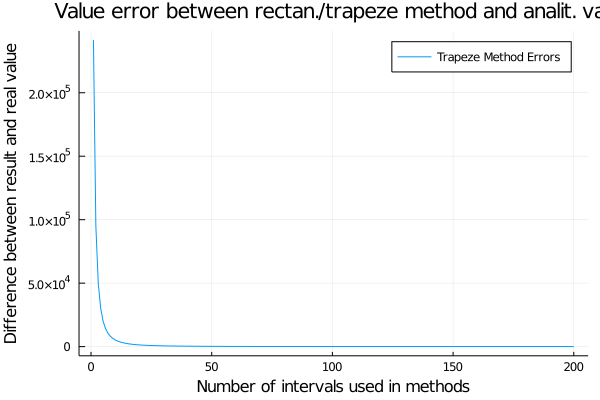

In [41]:
plot(Results.NumOfIntervals,Results.trapezeMethodValError,title = "Value error between rectan./trapeze method and analit. val.",xlabel = "Number of intervals used in methods",ylabel = "Difference between result and real value",label = "Trapeze Method Errors")

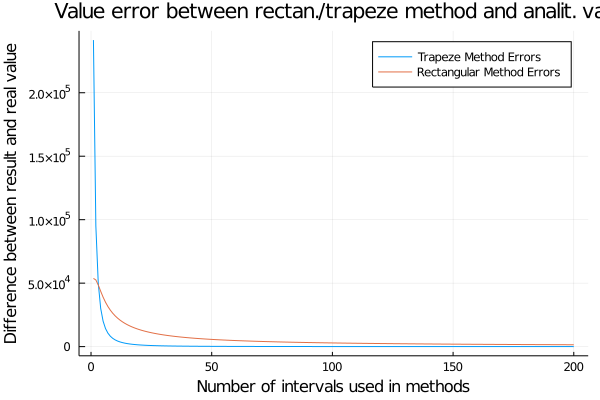

In [42]:
plot!(Results.NumOfIntervals,Results.rectangularMethodValError,label = "Rectangular Method Errors")

In [43]:
f(x) = 3^x #Rozwazymy funkcje wykladnicza na przedziale 0-10
trapeze = zeros(0)
rectangular = zeros(0)
(real,add) = quadgk(f,0,10)
NumOfIntervals = zeros(0)
for i in 1:70
    a = rectangularMethod(f,0,10,i)
    b = trapezeMethod(f,0,10,i)
    append!(rectangular,abs(a - real))
    append!(trapeze,abs(b - real))
    append!(NumOfIntervals,i)
end

In [44]:
Results = DataFrame(NumOfIntervals = NumOfIntervals,trapezeMethodValError = trapeze,rectangularMethodValError = rectangular)

,NumOfIntervals,trapezeMethodValError,rectangularMethodValError
,Float64,Float64,Float64
1,1.0,2.41502e5,53737.8
2,2.0,95092.2,52527.8
3,3.0,49853.3,48560.1
4,4.0,30181.2,43628.8
5,5.0,20062.2,38985.8
6,6.0,14239.1,34967.5
7,7.0,10604.6,31572.6
8,8.0,8192.62,28712.4
9,9.0,6513.88,26290.6


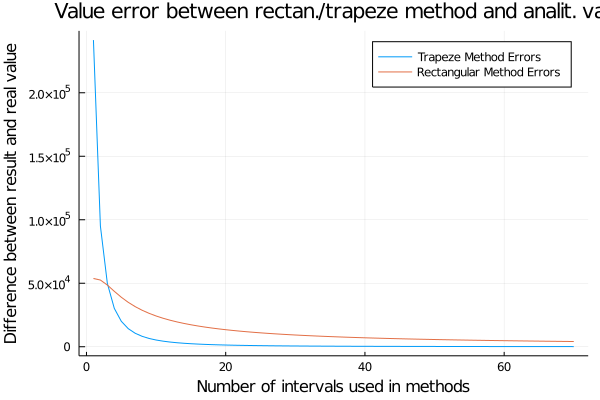

In [45]:
plot(Results.NumOfIntervals,Results.trapezeMethodValError,title = "Value error between rectan./trapeze method and analit. val.",xlabel = "Number of intervals used in methods",ylabel = "Difference between result and real value",label = "Trapeze Method Errors")
plot!(Results.NumOfIntervals,Results.rectangularMethodValError,label = "Rectangular Method Errors")

# Zadanie 5 - Funkcja trygonometryczna

In [46]:
f(x) = sin(x) #Rozwazymy funkcje wykladnicza na przedziale 0-10
trapeze = zeros(0)
rectangular = zeros(0)
(real,add) = quadgk(f,0,2*pi)
NumOfIntervals = zeros(0)
for i in 1:200
    a = rectangularMethod(f,0,2*pi,i)
    b = trapezeMethod(f,0,2*pi,i)
    append!(rectangular,abs(a - real))
    append!(trapeze,abs(b - real))
    append!(NumOfIntervals,i)
end

In [47]:
Results = DataFrame(NumOfIntervals = NumOfIntervals,trapezeMethodValError = trapeze,rectangularMethodValError = rectangular)

,NumOfIntervals,trapezeMethodValError,rectangularMethodValError
,Float64,Float64,Float64
1,1.0,9.71997e-16,2.02529e-16
2,2.0,2.02529e-16,1.82205e-16
3,3.0,6.03074e-18,2.6252e-16
4,4.0,4.61092e-17,1.46258e-16
5,5.0,2.16908e-16,6.30142e-17
6,6.0,4.47036e-16,3.18791e-16
7,7.0,4.12106e-16,3.02182e-16
8,8.0,4.73106e-16,3.76922e-16
9,9.0,2.10517e-16,1.25021e-16


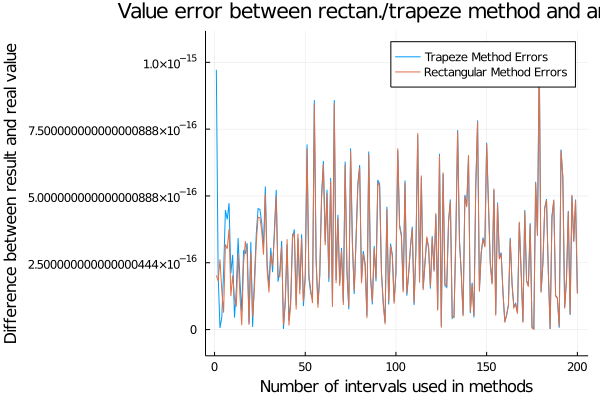

In [48]:
plot(Results.NumOfIntervals,Results.trapezeMethodValError,title = "Value error between rectan./trapeze method and analit. val.",xlabel = "Number of intervals used in methods",ylabel = "Difference between result and real value",label = "Trapeze Method Errors")
plot!(Results.NumOfIntervals,Results.rectangularMethodValError,label = "Rectangular Method Errors")

In [49]:
f(x) = sin(x) #Rozwazymy funkcje wykladnicza na przedziale 0-10
trapeze = zeros(0)
rectangular = zeros(0)
(real,add) = quadgk(f,0,2*pi)
NumOfIntervals = zeros(0)
for i in 1:50
    a = rectangularMethod(f,0,2*pi,i)
    b = trapezeMethod(f,0,2*pi,i)
    append!(rectangular,abs(a - real))
    append!(trapeze,abs(b - real))
    append!(NumOfIntervals,i)
end

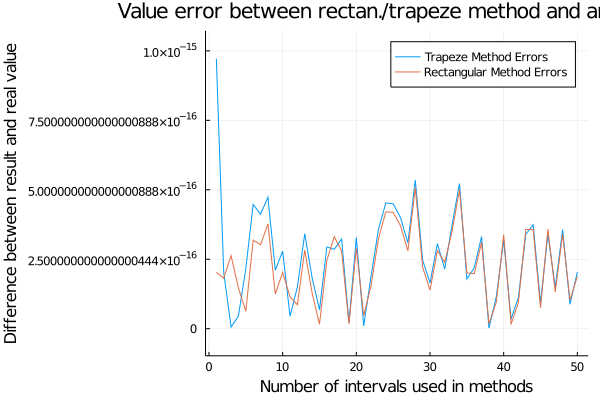

In [50]:
Results = DataFrame(NumOfIntervals = NumOfIntervals,trapezeMethodValError = trapeze,rectangularMethodValError = rectangular)
plot(Results.NumOfIntervals,Results.trapezeMethodValError,title = "Value error between rectan./trapeze method and analit. val.",xlabel = "Number of intervals used in methods",ylabel = "Difference between result and real value",label = "Trapeze Method Errors")
plot!(Results.NumOfIntervals,Results.rectangularMethodValError,label = "Rectangular Method Errors")

In [51]:
f(x) = sin(x) #Rozwazymy funkcje wykladnicza na przedziale 0-10
trapeze = zeros(0)
rectangular = zeros(0)
(real,add) = quadgk(f,0,2*pi)
NumOfIntervals = zeros(0)
for i in 1:20
    a = rectangularMethod(f,0,2*pi,i)
    b = trapezeMethod(f,0,2*pi,i)
    append!(rectangular,abs(a - real))
    append!(trapeze,abs(b - real))
    append!(NumOfIntervals,i)
end

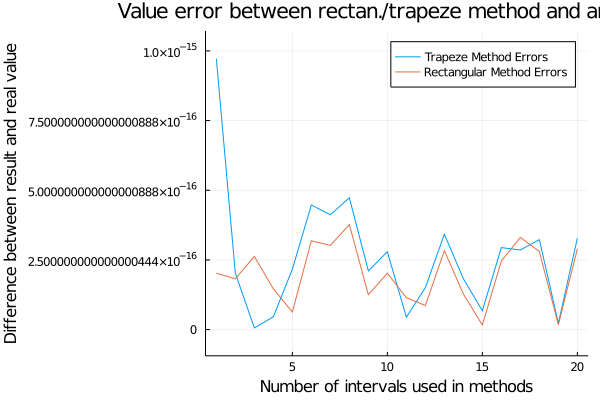

In [52]:
Results = DataFrame(NumOfIntervals = NumOfIntervals,trapezeMethodValError = trapeze,rectangularMethodValError = rectangular)
plot(Results.NumOfIntervals,Results.trapezeMethodValError,title = "Value error between rectan./trapeze method and analit. val.",xlabel = "Number of intervals used in methods",ylabel = "Difference between result and real value",label = "Trapeze Method Errors")
plot!(Results.NumOfIntervals,Results.rectangularMethodValError,label = "Rectangular Method Errors")